In [3]:
import numpy as np
import pandas as pd
from plotnine import *
import matplotlib as plt

from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

ModuleNotFoundError: No module named 'plotnine'

## Regularização e Grid Search

In [2]:
# Usaremos o dataset no qual mediremos o comprimento de um cateter (em cm) de acordo com a altura (em metros) do paciente
df = pd.DataFrame(data=[[1.087, 37], [1.613, 50], [0.953, 34], [1.003, 36], [1.156,43], [0.978, 28], [1.092, 37], [0.572, 20], [0.940, 34], [0.597, 30], [0.838, 38], [1.473, 47]], columns=['Altura','Comprimento'])

In [3]:
df

,Altura,Comprimento
0,1.087,37
1,1.613,50
2,0.953,34
3,1.003,36
4,1.156,43
5,0.978,28
6,1.092,37
7,0.572,20
8,0.940,34
9,0.597,30


## Gerando mais instâncias para o dataset do cateter

In [4]:
import random
import math

add_instances_into_dataset = 200

random.seed(add_instances_into_dataset)

size_df = len(df)

for i in range(add_instances_into_dataset):
    rand_altura = random.randrange(800, 1600)
    rand_altura /= 1000
    
    rand_comprimento = rand_altura*25 + random.randrange(10, 15)
    rand_comprimento = math.floor(rand_comprimento)

    new_row = {'Altura': rand_altura, 'Comprimento': rand_comprimento}
    df = df.append(new_row, ignore_index=True)
    

In [7]:
df

,Altura,Comprimento
0,1.087,37.0
1,1.613,50.0
2,0.953,34.0
3,1.003,36.0
4,1.156,43.0
...,...,...
207,0.926,36.0
208,1.348,44.0
209,1.529,48.0
210,1.344,46.0


In [9]:
X = df[['Altura']]
y = df[['Comprimento']]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
print("TREINAMENTO:")
print("X:", X_train.shape, "y:", y_train.shape)
print("TESTE:")
print("X:", X_test.shape, "y:", y_test.shape)

TREINAMENTO:
X: (142, 1) y: (142, 1)
TESTE:
X: (70, 1) y: (70, 1)


## Linear Regression w/o Ridge

In [8]:
from sklearn.linear_model import LinearRegression
regr = linear_model.LinearRegression()
regr

LinearRegression()

In [9]:
regr.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = regr.predict(X_test)
y_pred.shape

(70, 1)

In [11]:
print('Coefficient(s): \n', regr.coef_)
print('Intercept(s): \n', regr.intercept_)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_pred, y_test))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficient(s): 
 [[24.92705744]]
Intercept(s): 
 [11.38086511]
Mean squared error: 2.93
Coefficient of determination: 0.93


# Ridge

In [1]:
ridge_clf = Ridge(alpha=1.0) # Método dos Mínimos Quadrados com Ridge (OLS implemented)

NameError: name 'Ridge' is not defined

In [13]:
ridge_clf.fit(X_train, y_train)

Ridge()

In [14]:
y_pred = ridge_clf.predict(X_test)

In [15]:
print('Coefficients: \n', ridge_clf.coef_, 'Independent term:', ridge_clf.intercept_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [[22.18236233]] Independent term: [14.70190754]
Mean squared error: 3.55
Coefficient of determination: 0.91


## Ridge com Grid Search

In [16]:
parameters = {'alpha':[1,2,3]} #O hiperparâmetro Lambda é chamado de Alpha no ScikitLearn

In [17]:
clf = GridSearchCV(Ridge(), parameters, scoring='r2', refit=True) 

In [18]:
clf.fit(X_train, y_train)

GridSearchCV(estimator=Ridge(), param_grid={'alpha': [1, 2, 3]}, scoring='r2')

In [19]:
# Retorna o hiperparâmetro que apresentou melhor resultado
clf.best_params_

{'alpha': 1}

In [20]:
# Retorna o score do melhor hiperparâmetro obtido
clf.best_score_

0.9107275863855946

In [21]:
# Mostra o relatório geral
clf.cv_results_

{'mean_fit_time': array([0.00539646, 0.00359721, 0.00328488]),
 'std_fit_time': array([0.00257535, 0.00048916, 0.00057235]),
 'mean_score_time': array([0.00359735, 0.00259895, 0.00259895]),
 'std_score_time': array([0.00135514, 0.00048887, 0.00048868]),
 'param_alpha': masked_array(data=[1, 2, 3],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 1}, {'alpha': 2}, {'alpha': 3}],
 'split0_test_score': array([0.91286339, 0.8815138 , 0.84249387]),
 'split1_test_score': array([0.87188018, 0.84544055, 0.81010292]),
 'split2_test_score': array([0.89598408, 0.84483485, 0.79349809]),
 'split3_test_score': array([0.94763079, 0.91554515, 0.87428563]),
 'split4_test_score': array([0.9252795 , 0.89589719, 0.85725134]),
 'mean_test_score': array([0.91072759, 0.87664631, 0.83552637]),
 'std_test_score': array([0.02570859, 0.02790404, 0.02978432]),
 'rank_test_score': array([1, 2, 3])}

In [22]:
y_pred = clf.predict(X_test)

In [23]:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Mean squared error: 3.55
Coefficient of determination: 0.91


### Train-Valid-Test K-fold Generalized

In [24]:
X.shape

(212, 1)

In [25]:
y.shape

(212, 1)

In [26]:
for i in range(42,46):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i)
    
    parameters = {'alpha':[1,2,3]}
    
    clf = GridSearchCV(Ridge(), parameters, scoring='r2', refit=True) 
    clf.fit(X_train, y_train)
    
    print("---------SUMMARY---------")
    print(clf.cv_results_)
    print("-------BEST PARAMS-------")
    print(clf.best_params_)
    print("---------RESULTS---------")
    y_pred = clf.predict(X_test)
    print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
    print("-------------------------\n")

---------SUMMARY---------
{'mean_fit_time': array([0.00379844, 0.00359788, 0.00319953]), 'std_fit_time': array([0.00074883, 0.00048961, 0.00040307]), 'mean_score_time': array([0.00259924, 0.0023984 , 0.00279675]), 'std_score_time': array([0.00048833, 0.00048938, 0.00040298]), 'param_alpha': masked_array(data=[1, 2, 3],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 1}, {'alpha': 2}, {'alpha': 3}], 'split0_test_score': array([0.91286339, 0.8815138 , 0.84249387]), 'split1_test_score': array([0.87188018, 0.84544055, 0.81010292]), 'split2_test_score': array([0.89598408, 0.84483485, 0.79349809]), 'split3_test_score': array([0.94763079, 0.91554515, 0.87428563]), 'split4_test_score': array([0.9252795 , 0.89589719, 0.85725134]), 'mean_test_score': array([0.91072759, 0.87664631, 0.83552637]), 'std_test_score': array([0.02570859, 0.02790404, 0.02978432]), 'rank_test_score': array([1, 2, 3])}
-------BEST PARAMS-------
{'alpha': 1}
-

# LASSO

In [27]:
for i in range(42,46):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i)
    
    parameters = {'alpha':[0.1, 0.2, 0.3]}
    
    lasso = GridSearchCV(Lasso(), parameters, scoring='r2', refit=True) 
    lasso.fit(X_train, y_train)
    
    print("---------SUMMARY---------")
    print(lasso.cv_results_)
    print("-------BEST PARAMS-------")
    print(lasso.best_params_)
    print("---------RESULTS---------")
    y_pred = lasso.predict(X_test)
    print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
    print("-------------------------\n")

---------SUMMARY---------
{'mean_fit_time': array([0.00379753, 0.00259848, 0.00624995]), 'std_fit_time': array([0.00039959, 0.00135573, 0.0076546 ]), 'mean_score_time': array([0.00259852, 0.00201464, 0.        ]), 'std_score_time': array([0.0004891 , 0.00125182, 0.        ]), 'param_alpha': masked_array(data=[0.1, 0.2, 0.3],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 0.1}, {'alpha': 0.2}, {'alpha': 0.3}], 'split0_test_score': array([0.92230334, 0.91174478, 0.89202015]), 'split1_test_score': array([0.87825069, 0.87117329, 0.85516641]), 'split2_test_score': array([0.918821  , 0.89037395, 0.85344408]), 'split3_test_score': array([0.95599459, 0.94620627, 0.92534554]), 'split4_test_score': array([0.93245986, 0.92410511, 0.90536634]), 'mean_test_score': array([0.9215659 , 0.90872068, 0.8862685 ]), 'std_test_score': array([0.02525193, 0.02606685, 0.02817661]), 'rank_test_score': array([1, 2, 3])}
-------BEST PARAMS-------
{'

# ELASTIC NET

In [28]:
iteration = 1
for i in range(42,46):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i)
    
    parameters = {'alpha':[0.1, 0.2, 0.3], 'l1_ratio':[0.1, 0.3, 0.5, 0.7, 0.9]}
    
    EN = GridSearchCV(ElasticNet(), parameters, scoring='r2', refit=True) 
    EN.fit(X_train, y_train)
    
    print("---------SUMMARY", iteration, "---------\n")
    print(EN.cv_results_)
    print("-------BEST PARAMS-------")
    print(EN.best_params_)
    print("---------RESULTS---------")
    y_pred = EN.predict(X_test)
    print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
    print("-------------------------\n")
    
    iteration+=1

---------SUMMARY 1 ---------

{'mean_fit_time': array([0.00399675, 0.00340452, 0.00312471, 0.00312495, 0.0031249 ,
       0.00312481, 0.00465145, 0.00339799, 0.00339775, 0.00319791,
       0.0031981 , 0.003198  , 0.00359778, 0.00319815, 0.00359778]), 'std_fit_time': array([0.00063188, 0.00333189, 0.00624943, 0.0062499 , 0.00624981,
       0.00624962, 0.00644578, 0.00048965, 0.00048965, 0.00039983,
       0.00039973, 0.00039978, 0.00048953, 0.00039971, 0.00048953]), 'mean_score_time': array([0.00259914, 0.00744963, 0.00312467, 0.00312505, 0.0031249 ,
       0.0031249 , 0.00159874, 0.00239849, 0.00239863, 0.00239863,
       0.00259824, 0.00259838, 0.00259838, 0.00279818, 0.0021986 ]), 'std_score_time': array([0.0004901 , 0.00676493, 0.00624933, 0.0062501 , 0.00624981,
       0.00624981, 0.00135536, 0.00048959, 0.00048967, 0.00048957,
       0.00048955, 0.00048967, 0.00048967, 0.00039964, 0.00039988]), 'param_alpha': masked_array(data=[0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.3

---------SUMMARY 4 ---------

{'mean_fit_time': array([0.00319805, 0.00339661, 0.0031981 , 0.0033987 , 0.00319872,
       0.00359774, 0.00340118, 0.00319815, 0.0034009 , 0.0033978 ,
       0.00339789, 0.00319972, 0.00339856, 0.00339794, 0.00319805]), 'std_fit_time': array([0.00039976, 0.00049059, 0.00039973, 0.00049072, 0.00039942,
       0.00048969, 0.00049027, 0.00039971, 0.00049321, 0.00048961,
       0.00048963, 0.00040321, 0.00049064, 0.00048959, 0.00039999]), 'mean_score_time': array([0.0029985 , 0.00239978, 0.00279813, 0.00239768, 0.00259762,
       0.00239859, 0.0023952 , 0.00279813, 0.00239549, 0.00259809,
       0.00239892, 0.00259676, 0.00259771, 0.00259838, 0.00259833]), 'std_score_time': array([7.62939453e-07, 4.90975134e-04, 3.99732604e-04, 4.90351373e-04,
       4.90408655e-04, 4.89609386e-04, 4.92286100e-04, 3.99732661e-04,
       4.91953698e-04, 4.89142509e-04, 4.89239883e-04, 4.91563158e-04,
       4.90584395e-04, 4.89570445e-04, 4.89531566e-04]), 'param_alpha': maske

# (Curiosidades do Scikit-Learn)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
print("TREINAMENTO:")
print("X:", X_train.shape, "y:", y_train.shape)
print("TESTE:")
print("X:", X_test.shape, "y:", y_test.shape)

TREINAMENTO:
X: (142, 1) y: (142, 1)
TESTE:
X: (70, 1) y: (70, 1)


In [31]:
RCV = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1], cv=5, normalize=False, scoring='r2').fit(X_train, y_train)
RCV.score(X, y)

0.9310983931624341

In [32]:
print("---------RESULTS---------")
y_pred = RCV.predict(X_test)
print('Mean squared error: %.2f'
  % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
  % r2_score(y_test, y_pred))

---------RESULTS---------
Mean squared error: 2.95
Coefficient of determination: 0.93


### Função Generalizadora

In [33]:
def treinamento(X, y, model, hyperparameters, outter_cv=5):

    
    for i in range(outter_cv):
    
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i)

        m = GridSearchCV(model, hyperparameters, scoring='r2', refit=True) 
        m.fit(X_train, y_train)

        print("---------SUMMARY", i+1, "---------")
        print(m.cv_results_)
        print("-------BEST PARAMS-------")
        print(m.best_params_)
        print("---------RESULTS---------")
        y_pred = m.predict(X_test)
        print('Mean squared error: %.2f'
          % mean_squared_error(y_test, y_pred))
        # The coefficient of determination: 1 is perfect prediction
        print('Coefficient of determination: %.2f'
          % r2_score(y_test, y_pred))
        print("-------------------------\n")

In [34]:
hyperparameters = {'alpha':[1,2,3]}
model = Ridge()
treinamento(X, y, model, hyperparameters)

---------SUMMARY 1 ---------
{'mean_fit_time': array([0.00339799, 0.00299768, 0.0031981 ]), 'std_fit_time': array([4.89746801e-04, 6.46813391e-07, 3.99375086e-04]), 'mean_score_time': array([0.00279846, 0.00219884, 0.00279827]), 'std_score_time': array([0.0003993 , 0.00039952, 0.00039945]), 'param_alpha': masked_array(data=[1, 2, 3],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 1}, {'alpha': 2}, {'alpha': 3}], 'split0_test_score': array([0.90922999, 0.88029042, 0.84304284]), 'split1_test_score': array([0.90394583, 0.87165787, 0.83210588]), 'split2_test_score': array([0.95010612, 0.92958779, 0.89610156]), 'split3_test_score': array([0.90622809, 0.85566357, 0.80234572]), 'split4_test_score': array([0.90381459, 0.84867103, 0.78840611]), 'mean_test_score': array([0.91466492, 0.87717414, 0.83240042]), 'std_test_score': array([0.01782934, 0.02850426, 0.0374432 ]), 'rank_test_score': array([1, 2, 3])}
-------BEST PARAMS-------

# Polynomial

In [35]:
df = pd.DataFrame(data=[[1.087, 37], [1.613, 50], [0.953, 34], [1.003, 36], [1.156,43], [0.978, 28], [1.092, 37], [0.572, 20], [0.940, 34], [0.597, 30], [0.838, 38], [1.473, 47]], columns=['Altura','Comprimento'])
df

,Altura,Comprimento
0,1.087,37
1,1.613,50
2,0.953,34
3,1.003,36
4,1.156,43
5,0.978,28
6,1.092,37
7,0.572,20
8,0.940,34
9,0.597,30


In [36]:
import random
import math


add_instances_into_dataset = 100

random.seed(1845)

size_df = len(df)

for i in range(add_instances_into_dataset):
    rand_altura = random.randrange(500, 2200)
    rand_altura /= 1000

    rand_comprimento = rand_altura*25 + random.randrange(10, 50)
    rand_comprimento = math.floor(rand_comprimento)

    new_row = {'Altura': rand_altura, 'Comprimento': rand_comprimento}
    df = df.append(new_row, ignore_index=True)

In [37]:
df.shape

(112, 2)

In [38]:
X = df[['Altura']]
y = df[['Comprimento']]

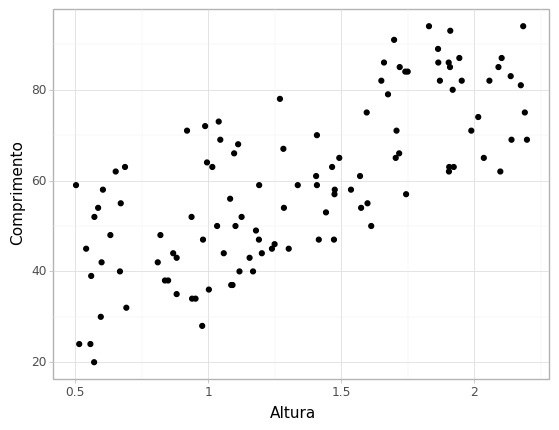

<ggplot: (118187982990)>

In [39]:
(ggplot(df,aes('Altura','Comprimento'))
 + geom_point()
 + theme_light()
)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [41]:
print("TREINAMENTO:")
print("X:", X_train.shape, "y:", y_train.shape)
print("TESTE:")
print("X:", X_test.shape, "y:", y_test.shape)

TREINAMENTO:
X: (75, 1) y: (75, 1)
TESTE:
X: (37, 1) y: (37, 1)


In [42]:
param_grid = [
    {'poly__degree': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
    'ridge__alpha':[0,1,2]}
  ]
pipeline = Pipeline(steps=[('poly', PolynomialFeatures()), ('ridge', Ridge())])
grid_search = GridSearchCV(pipeline, param_grid, cv=5,
                           scoring='r2',
                           refit=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             param_grid=[{'poly__degree': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
                          'ridge__alpha': [0, 1, 2]}],
             scoring='r2')

In [43]:
grid_search.best_params_

{'poly__degree': 6, 'ridge__alpha': 2}

In [44]:
grid_search.cv_results_

{'mean_fit_time': array([0.00519686, 0.0041985 , 0.00499873, 0.00459714, 0.00499883,
        0.00459871, 0.00519671, 0.0049973 , 0.00439763, 0.0047965 ,
        0.00419769, 0.00419698, 0.00479712, 0.00479712, 0.00479712,
        0.00648465, 0.00459695, 0.00499682, 0.00479712, 0.0041975 ,
        0.00439734, 0.00519767, 0.00579548, 0.00559659, 0.00559702,
        0.0055963 , 0.00499721, 0.00479717, 0.00499697, 0.00479693,
        0.004597  , 0.00499687, 0.00439687]),
 'std_fit_time': array([3.99805946e-04, 4.01759187e-04, 3.31530443e-06, 4.89648320e-04,
        2.96100134e-06, 4.91038274e-04, 3.99995117e-04, 4.62310777e-07,
        4.89979451e-04, 3.99471194e-04, 4.00614749e-04, 3.99303436e-04,
        3.99780273e-04, 3.99661416e-04, 3.99780472e-04, 6.94353040e-03,
        4.89687246e-04, 9.53674316e-08, 3.99780302e-04, 3.99875641e-04,
        4.89628863e-04, 4.00355772e-04, 7.48138127e-04, 7.98976672e-04,
        4.89221507e-04, 4.89804163e-04, 7.44843452e-07, 3.99804126e-04,
        6

In [45]:
print("-------BEST PARAMS-------")
grid_search.best_params_
print("---------RESULTS---------")
y_pred = grid_search.predict(X_test)
print('Mean squared error: %.2f'
  % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
  % r2_score(y_test, y_pred))
print("-------------------------\n")

-------BEST PARAMS-------
---------RESULTS---------
Mean squared error: 127.54
Coefficient of determination: 0.61
-------------------------



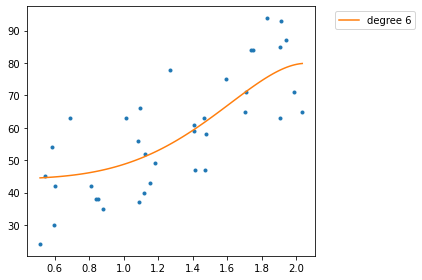

In [46]:
import matplotlib.pyplot as plt

xp = np.linspace(X_test.min(), X_test.max(), 100)
_ = plt.plot(X_test, y_test, '.')

for count, degree in enumerate([6]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge(2))
    model.fit(X_train, y_train)
    _ = plt.plot(xp, model.predict(xp), '-',label="degree "+str(degree))
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

## Polynomial + Outter CV

In [5]:
import numpy as np
import pandas as pd
import matplotlib as plt

from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [8]:
# Usaremos o dataset no qual mediremos o comprimento de um cateter (em cm) de acordo com a altura (em metros) do paciente
df = pd.DataFrame(data=[[1.087, 37], [1.613, 50], [0.953, 34], [1.003, 36], [1.156,43], [0.978, 28], [1.092, 37], [0.572, 20], [0.940, 34], [0.597, 30], [0.838, 38], [1.473, 47]], columns=['Altura','Comprimento'])

In [9]:
import random
import math

add_instances_into_dataset = 200

random.seed(add_instances_into_dataset)

size_df = len(df)

for i in range(add_instances_into_dataset):
    rand_altura = random.randrange(800, 1600)
    rand_altura /= 1000
    
    rand_comprimento = rand_altura*25 + random.randrange(10, 15)
    rand_comprimento = math.floor(rand_comprimento)

    new_row = {'Altura': rand_altura, 'Comprimento': rand_comprimento}
    df = df.append(new_row, ignore_index=True)
    

In [10]:
X = df[['Altura']]
y = df[['Comprimento']]

In [25]:
# iteration = 1
# for i in range(42,46):
i = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i)

param_grid = [
{'poly__degree': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
'ridge__alpha':[0,1,2]}
  ]
pipeline = Pipeline(steps=[('std',StandardScaler()),('poly', PolynomialFeatures()), ('ridge', Ridge())])
grid_search = GridSearchCV(pipeline, param_grid, cv=5,
                            scoring='r2',
                            refit=True)
grid_search.fit(X_train, y_train)


print("-------BEST PARAMS-------")
print(grid_search.best_params_)
print("---------RESULTS---------")
y_pred = grid_search.predict(X_test)
print('Mean squared error: %.2f'
  % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
  % r2_score(y_test, y_pred))
print("-------------------------\n")


-------BEST PARAMS-------
{'poly__degree': 4, 'ridge__alpha': 0}
---------RESULTS---------
Mean squared error: 3.70
Coefficient of determination: 0.91
-------------------------



In [26]:
cl = grid_search.best_estimator_
(grid_search.predict(X_test) - cl.predict(X_test)).sum()

0.0

In [29]:
X_test

,Altura
30,1.303
173,1.309
140,1.173
75,1.028
60,1.495
...,...
65,0.870
122,1.279
180,1.543
31,0.994


In [33]:
scaler = StandardScaler()
x_norm = scaler.fit_transform(X_test)
x_norm

array([[ 0.5181211 ],
       [ 0.54261855],
       [-0.01265702],
       [-0.60467876],
       [ 1.30203954],
       [ 1.44085843],
       [-0.4821915 ],
       [-0.90681399],
       [-2.36441235],
       [-1.2906074 ],
       [ 1.06931375],
       [ 1.06523085],
       [ 1.10197702],
       [ 1.5674286 ],
       [-0.42094787],
       [-0.66183948],
       [-0.89864818],
       [ 1.46535589],
       [ 0.68552035],
       [ 0.17107387],
       [-1.44984083],
       [-1.4825041 ],
       [-1.35593394],
       [-1.02113543],
       [ 0.99173849],
       [-0.37603588],
       [ 0.39971675],
       [ 0.0445037 ],
       [ 1.35511735],
       [-0.17189045],
       [-1.13137396],
       [-0.82515582],
       [-0.85373618],
       [-1.4825041 ],
       [-0.75574638],
       [ 0.50995528],
       [-0.02082283],
       [ 0.04042079],
       [-0.147393  ],
       [ 0.37930221],
       [ 0.70185198],
       [ 1.26529337],
       [ 0.59977927],
       [ 0.21598586],
       [ 0.46096038],
       [ 1

In [37]:
cl.predict(X_test)

array([[44.02278481],
       [44.19172715],
       [40.46295863],
       [36.99236273],
       [48.82876434],
       [49.37396712],
       [37.66722145],
       [35.36664909],
       [21.90594588],
       [33.17959867],
       [47.62628242],
       [47.60265519],
       [47.81258892],
       [49.72406201],
       [38.01158491],
       [36.68237688],
       [35.41066958],
       [49.45357998],
       [45.17185466],
       [41.65851789],
       [32.13804795],
       [31.90891499],
       [32.76608702],
       [34.74405063],
       [47.16554503],
       [38.26755496],
       [43.20704996],
       [40.82918706],
       [49.05502604],
       [39.47253319],
       [34.12570515],
       [35.80541604],
       [35.65214169],
       [31.90891499],
       [36.17733034],
       [43.96645736],
       [40.41108957],
       [40.8028483 ],
       [39.62198888],
       [43.06693559],
       [45.28277868],
       [48.66041724],
       [44.58528845],
       [41.95827368],
       [43.62856171],
       [47

In [38]:
# automatic nested cross-validation for random forest on a classification dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# create dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=1, n_informative=10, n_redundant=10)
# configure the cross-validation procedure
cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
# define the model
model = RandomForestClassifier(random_state=1)
# define search space
space = dict()
space['n_estimators'] = [10, 100, 500]
space['max_features'] = [2, 4, 6]
# define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=1, cv=cv_inner, refit=True)
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# execute the nested cross-validation
scores = cross_val_score(search, X, y, scoring='accuracy', cv=cv_outer, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.927 (0.019)


In [49]:
fit = search.fit(X,y)

In [58]:
resul = fit.cv_results_
resul

{'mean_fit_time': array([0.05027278, 0.40639313, 2.10511843, 0.05061658, 0.4871513 ,
        2.43676813, 0.05953225, 0.55232565, 2.78401128]),
 'std_fit_time': array([0.00281413, 0.01067234, 0.00532028, 0.00065696, 0.00628293,
        0.02407834, 0.00470686, 0.01198075, 0.01447388]),
 'mean_score_time': array([0.00407656, 0.02650857, 0.13869627, 0.00395155, 0.02850795,
        0.13843989, 0.00558543, 0.0283343 , 0.13450678]),
 'std_score_time': array([0.00065543, 0.00235638, 0.00940483, 0.00033838, 0.00382413,
        0.00636331, 0.00263025, 0.00041085, 0.0035916 ]),
 'param_max_features': masked_array(data=[2, 2, 2, 4, 4, 4, 6, 6, 6],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[10, 100, 500, 10, 100, 500, 10, 100, 500],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fil

In [81]:
ps = pd.DataFrame(resul['params'])
ps = pd.concat([ps,pd.DataFrame(resul['mean_test_score'],columns=['score'])],axis=1)
ps

,max_features,n_estimators,score
0,2,10,0.889000
1,2,100,0.921005
2,2,500,0.926004
3,4,10,0.892018
4,4,100,0.927008
5,4,500,0.923007
6,6,10,0.889018
7,6,100,0.923001
8,6,500,0.923013


In [87]:
ps1 = ps.groupby(by='max_features')['score'].mean().reset_index(name='score')

In [82]:
import matplotlib.pyplot as plt

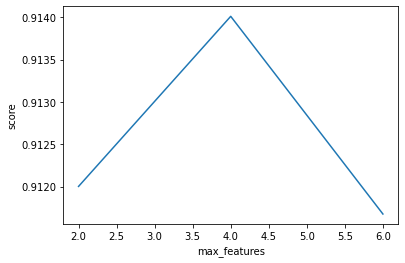

In [96]:
plt.plot(ps1['max_features'],ps1['score'])
plt.xlabel('max_features')
plt.ylabel('score')
plt.show()